In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('bank-full.csv', delimiter=';')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nTarget variable distribution:")
print(df['y'].value_counts())

Dataset Shape: (45211, 17)

First few rows:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211

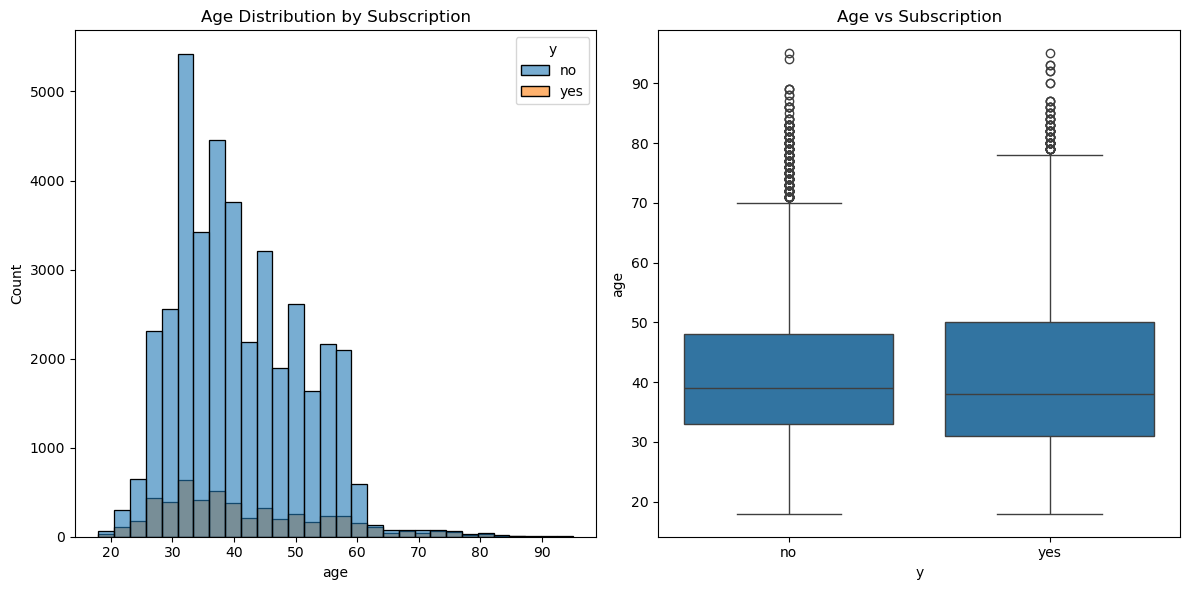

In [2]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', hue='y', bins=30, alpha=0.6)
plt.title('Age Distribution by Subscription')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='age')
plt.title('Age vs Subscription')
plt.tight_layout()
plt.show()

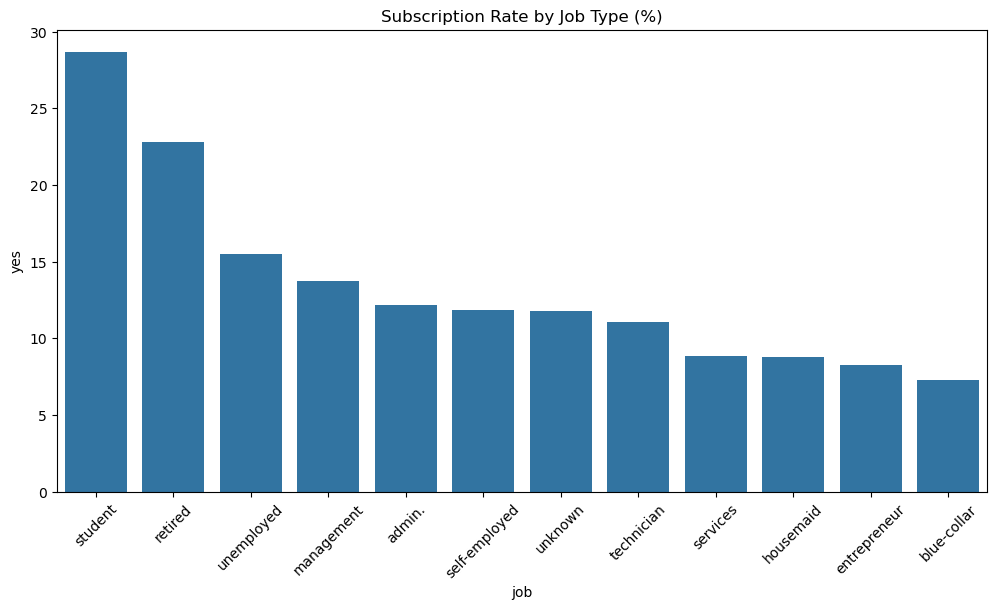

In [5]:
job_subscription = pd.crosstab(df['job'], df['y'], normalize='index') * 100
job_subscription = job_subscription.sort_values('yes', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_subscription.index, y=job_subscription['yes'])
plt.title('Subscription Rate by Job Type (%)')
plt.xticks(rotation=45)
plt.show()

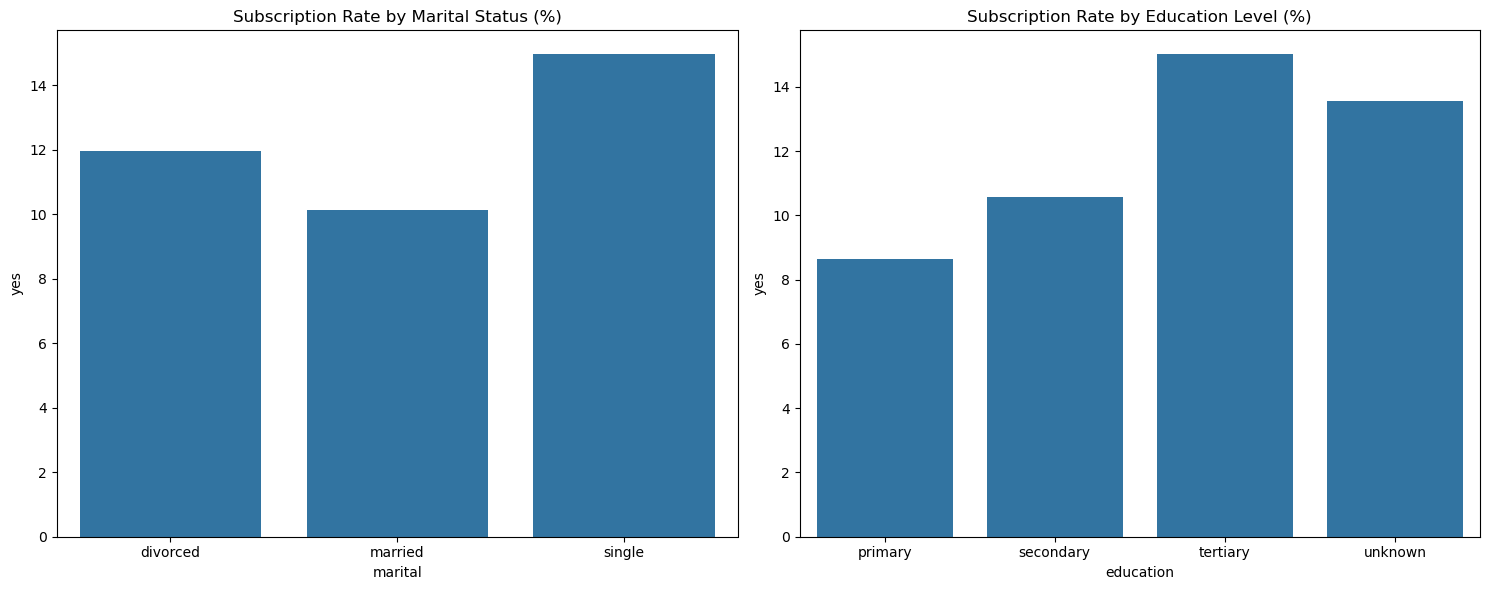

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Marital status
marital_subscription = pd.crosstab(df['marital'], df['y'], normalize='index') * 100
sns.barplot(x=marital_subscription.index, y=marital_subscription['yes'], ax=axes[0])
axes[0].set_title('Subscription Rate by Marital Status (%)')

# Education
education_subscription = pd.crosstab(df['education'], df['y'], normalize='index') * 100
sns.barplot(x=education_subscription.index, y=education_subscription['yes'], ax=axes[1])
axes[1].set_title('Subscription Rate by Education Level (%)')
plt.tight_layout()
plt.show()

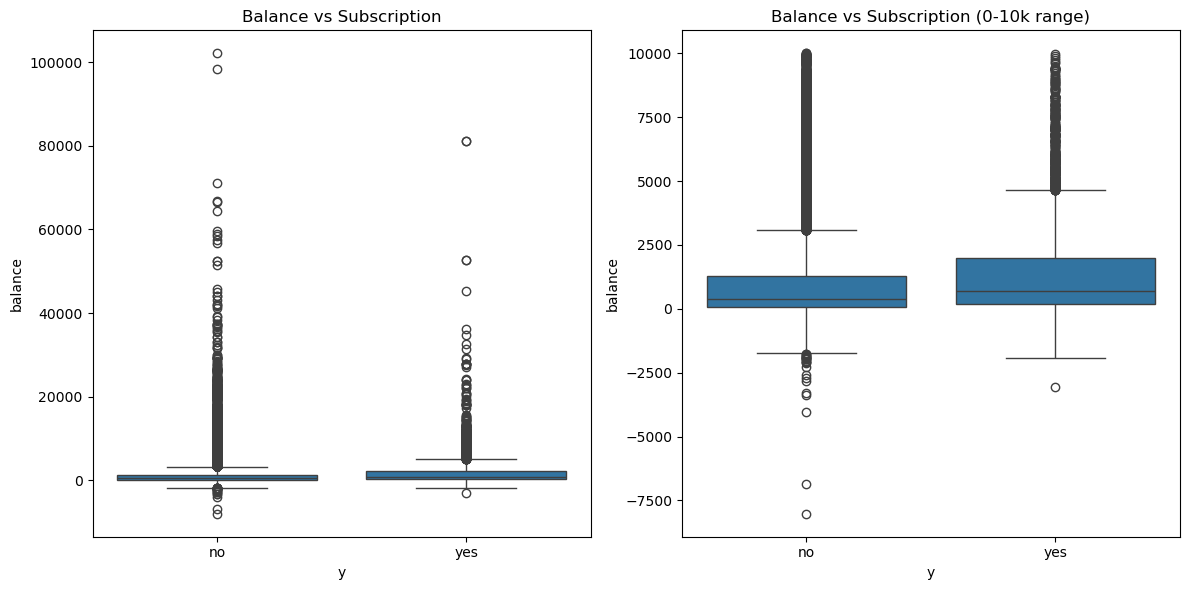

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='y', y='balance')
plt.title('Balance vs Subscription')

plt.subplot(1, 2, 2)
# Focus on reasonable balance range
df_reasonable = df[df['balance'] < 10000]
sns.boxplot(data=df_reasonable, x='y', y='balance')
plt.title('Balance vs Subscription (0-10k range)')
plt.tight_layout()
plt.show()

In [11]:
# Create a copy for modeling
df_model = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in categorical_columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Prepare features and target
X = df_model.drop('y', axis=1)
y = df_model['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (31647, 16)
Test set: (13564, 16)


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with increased iterations and scaled data
lr_model = LogisticRegression(random_state=42, max_iter=2000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Results:
Accuracy: 0.8912

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.60      0.22      0.32      1587

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



In [19]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Results:
Accuracy: 0.8974

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11977
           1       0.59      0.40      0.47      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.68      0.71     13564
weighted avg       0.88      0.90      0.89     13564



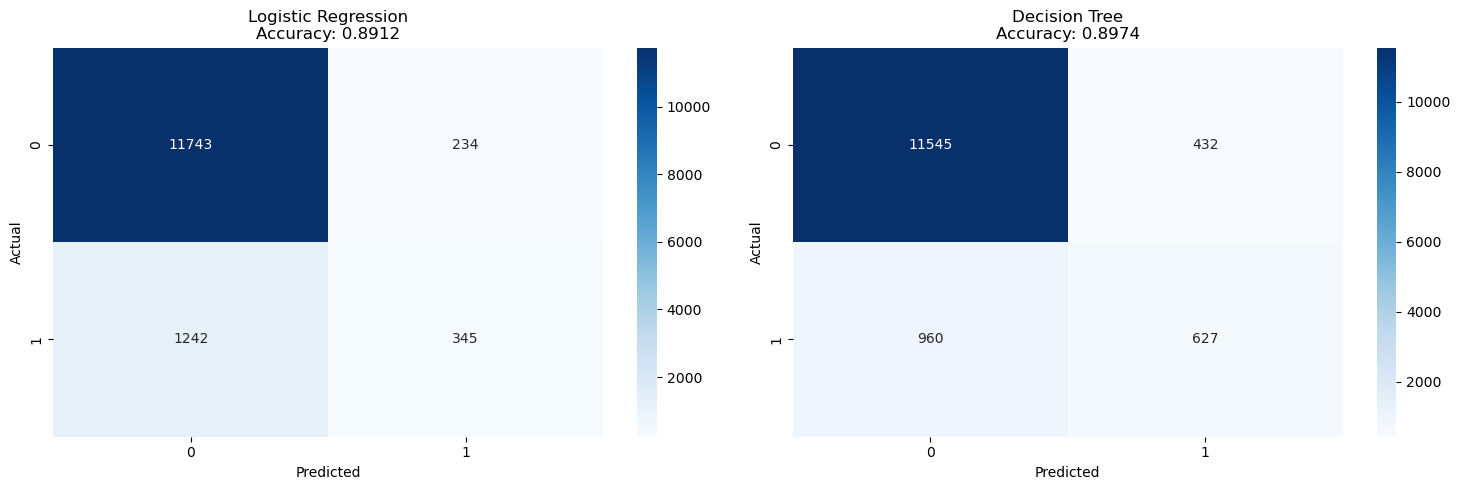

In [23]:
# Compare models using scaled data
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model
}

plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items()):
    if name == 'Logistic Regression':
        # Use scaled data for logistic regression
        predictions = model.predict(X_test_scaled)
    else:
        # Use original data for decision tree (it doesn't require scaling)
        predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    
    plt.subplot(1, 2, i+1)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}\nAccuracy: {accuracy:.4f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

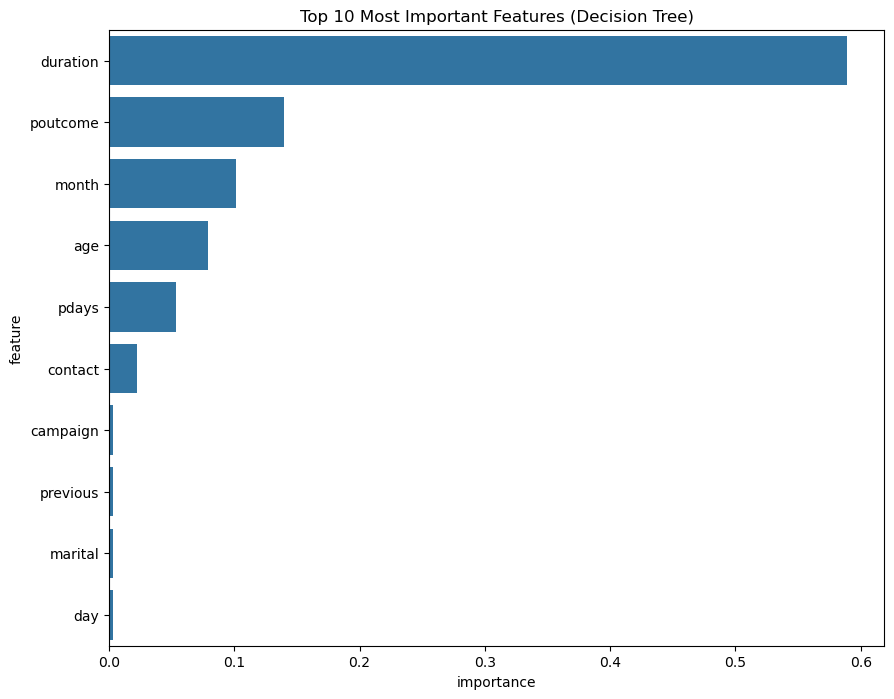

Top 10 Most Important Features:
     feature  importance
11  duration    0.589115
15  poutcome    0.139382
10     month    0.101207
0        age    0.078730
13     pdays    0.053278
8    contact    0.022529
12  campaign    0.003470
14  previous    0.003341
2    marital    0.003060
9        day    0.003001


In [25]:
# Feature importance from Decision Tree
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features (Decision Tree)')
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))